<a href="https://colab.research.google.com/github/SwastikaT/Face-Find/blob/master/All_City_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [113]:
import pandas as pd 
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [114]:
data = pd.read_csv('/content/gdrive/MyDrive/city_day.csv')

In [115]:
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [116]:
data['month'] = pd.DatetimeIndex(data['Date']).month
data['year'] = pd.DatetimeIndex(data['Date']).year
data.head()
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,month,year
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,1,2015
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,1,2015
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,1,2015
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,1,2015
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,6,2020
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,6,2020
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,6,2020
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,6,2020


In [117]:
data=data.reset_index(drop=True)
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,month,year
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,1,2015
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,1,2015
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,1,2015
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,1,2015
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,6,2020
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,6,2020
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,6,2020
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,6,2020


In [118]:
for column in data[['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]:
    print(column)
    count = data[column].isna().sum()
    print((count/2382)*100)

PM2.5
193.03106633081444
NO
150.37783375314862
NO2
150.5037783375315
NOx
175.6926952141058
NH3
433.58522250209904
CO
86.4399664147775
SO2
161.79680940386228
O3
168.84970612930312
Benzene
236.06213266162888
Toluene
337.57346767422337
Xylene
760.2434928631402


In [119]:
data.drop(columns = ['Xylene'], inplace = True)

In [120]:
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,month,year
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,NaN,NaN,1,2015
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,NaN,NaN,1,2015
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,NaN,NaN,1,2015
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,NaN,NaN,1,2015
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,NaN,NaN,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Good,6,2020
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Satisfactory,6,2020
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Satisfactory,6,2020
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Satisfactory,6,2020


In [121]:
for column in ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene']:
  colMean = data[column].mean(skipna = True)
  data[column].fillna(colMean, inplace = True)

In [122]:
data['AQI_Bucket'].value_counts()

Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: AQI_Bucket, dtype: int64

In [123]:
data['AQI_Bucket'].fillna("Satisfactory", inplace = True)

In [124]:
aqiMean = data['AQI'].mean(skipna = True)
data['AQI'].fillna(aqiMean, inplace = True)

In [125]:
data['City'] = data['City'].str.lower()
data['AQI_Bucket'] =data['AQI_Bucket'].str.lower()

In [126]:
data['Date'] = pd.to_datetime(data['Date'])

In [127]:
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,month,year
0,ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,166.463581,satisfactory,1,2015
1,ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,166.463581,satisfactory,1,2015
2,ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,166.463581,satisfactory,1,2015
3,ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,166.463581,satisfactory,1,2015
4,ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,166.463581,satisfactory,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,41.000000,good,6,2020
29527,visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,70.000000,satisfactory,6,2020
29528,visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,68.000000,satisfactory,6,2020
29529,visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,54.000000,satisfactory,6,2020


In [128]:
citiesEvaluated = ["delhi", "chennai", "kolkata", "lucknow"]
data_lockdown= data[(data['year']==2020)& (data['month']!=1) & (data['month']!=2)&(data['month']!=6)&(data['month']!=7)]
delhi_lockdown = data_lockdown[data_lockdown["City"] == "delhi"]
chennai_lockdown = data_lockdown[data_lockdown["City"] == "chennai"]
kolkata_lockdown = data_lockdown[data_lockdown["City"] == "kolkata"]
lucknow_lockdown = data_lockdown[data_lockdown["City"] == "lucknow"]
lockdownAverageAQI = []
lockdownAverageAQI.append(delhi_lockdown["AQI"].mean())
lockdownAverageAQI.append(chennai_lockdown["AQI"].mean())
lockdownAverageAQI.append(kolkata_lockdown["AQI"].mean())
lockdownAverageAQI.append(lucknow_lockdown["AQI"].mean())
lockdownAverageAQI

[132.70652173913044, 70.90217391304348, 82.25, 120.08695652173913]

<BarContainer object of 4 artists>

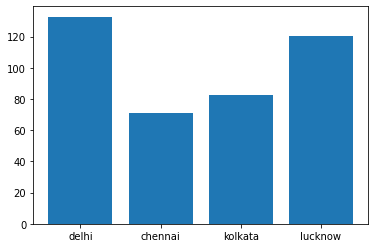

In [129]:
plt.bar(x = citiesEvaluated, height = lockdownAverageAQI)

In [130]:
data_2019= data[(data['year']==2019)& (data['month']!=1) & (data['month']!=2)&(data['month']!=6)&(data['month']!=7)]
data_2019

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,month,year
1520,ahmedabad,2019-03-01,42.11,118.127103,14.18,84.67,28.04,23.483476,14.18,49.29,47.63,4.11,32.38,350.000000,very poor,3,2019
1521,ahmedabad,2019-03-02,46.35,118.127103,9.25,69.51,21.69,23.483476,9.25,62.80,69.79,4.08,32.34,318.000000,very poor,3,2019
1522,ahmedabad,2019-03-03,61.32,118.127103,15.88,48.40,20.36,23.483476,15.88,49.88,21.17,4.16,32.45,338.000000,very poor,3,2019
1523,ahmedabad,2019-03-04,48.84,118.127103,9.85,42.96,15.71,23.483476,9.85,26.40,51.34,4.10,32.38,276.000000,poor,3,2019
1524,ahmedabad,2019-03-05,39.23,118.127103,12.69,67.29,23.08,23.483476,12.69,33.79,59.73,4.07,32.33,286.000000,poor,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29343,visakhapatnam,2019-12-27,51.79,118.127103,34.78,48.39,54.01,9.560000,1.24,9.01,34.62,6.72,12.41,101.000000,moderate,12,2019
29344,visakhapatnam,2019-12-28,74.53,118.127103,4.21,33.50,21.25,9.720000,1.21,6.30,42.20,5.58,9.34,110.000000,moderate,12,2019
29345,visakhapatnam,2019-12-29,41.00,118.127103,2.37,20.94,13.07,6.780000,0.74,6.25,70.48,3.76,12.04,133.000000,moderate,12,2019
29346,visakhapatnam,2019-12-30,44.79,118.127103,3.22,35.67,21.58,11.140000,1.06,9.71,77.40,4.41,7.69,166.463581,satisfactory,12,2019


In [131]:
data_2019= data[(data['year']==2019)& (data['month']!=1) & (data['month']!=2)&(data['month']!=6)&(data['month']!=7)]
delhi_2019 = data_2019[data_2019["City"] == "delhi"]
chennai_2019 = data_2019[data_2019["City"] == "chennai"]
kolkata_2019 = data_2019[data_2019["City"] == "kolkata"]
lucknow_2019 = data_2019[data_2019["City"] == "lucknow"]
beforeLockdownAverageAQI = []
beforeLockdownAverageAQI.append(delhi_2019["AQI"].mean())
beforeLockdownAverageAQI.append(chennai_2019["AQI"].mean())
beforeLockdownAverageAQI.append(kolkata_2019["AQI"].mean())
beforeLockdownAverageAQI.append(lucknow_2019["AQI"].mean())
beforeLockdownAverageAQI

[227.42857142857142, 98.2734693877551, 121.72244897959183, 201.59183673469389]

<BarContainer object of 4 artists>

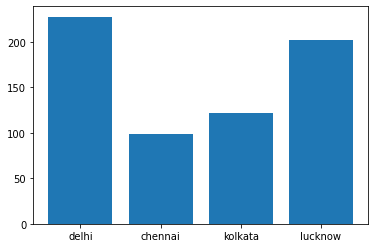

In [132]:
plt.bar(x = citiesEvaluated, height = beforeLockdownAverageAQI)

In [133]:
lockdownAverageAQI = np.array(lockdownAverageAQI)
beforeLockdownAverageAQI = np.array(beforeLockdownAverageAQI)

changeInAQI = ((beforeLockdownAverageAQI - lockdownAverageAQI)*100/beforeLockdownAverageAQI)
changeInAQI

array([41.64914245, 27.85217175, 32.4282409 , 40.43064518])

<BarContainer object of 4 artists>

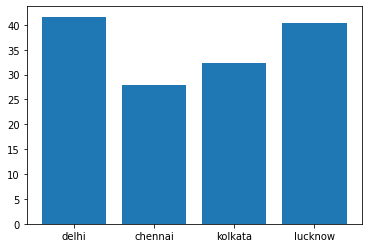

In [134]:
plt.bar(x = citiesEvaluated, height = changeInAQI)

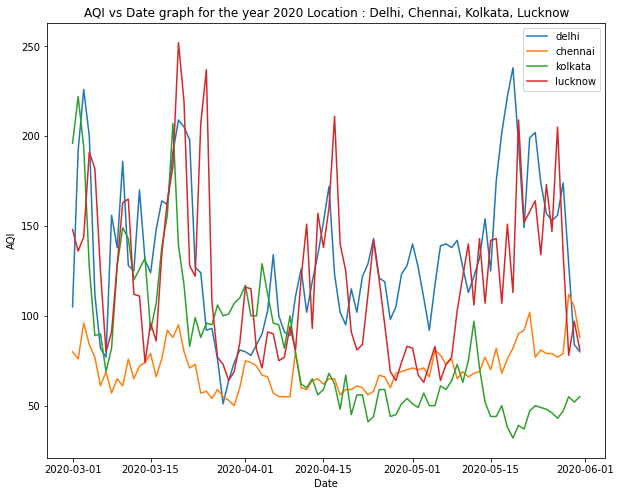

In [135]:
plt.figure(figsize=(10,8))
plt.plot(delhi_lockdown['Date'],delhi_lockdown['AQI'])
plt.plot(chennai_lockdown['Date'],chennai_lockdown['AQI'])
plt.plot(kolkata_lockdown['Date'],kolkata_lockdown['AQI'])
plt.plot(lucknow_lockdown['Date'],lucknow_lockdown['AQI'])
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("AQI vs Date graph for the year 2020 Location : Delhi, Chennai, Kolkata, Lucknow")
plt.legend(citiesEvaluated)